# Titanic - Machine Learning from Disaster                     ..... 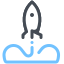  

## Author: RIDDY MAZUMDER
## 🔗 Connect with Me
> [![Kaggle](https://img.shields.io/badge/Kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/riddymazumder)
> [![GitHub](https://img.shields.io/badge/GitHub-181717?style=for-the-badge&logo=github&logoColor=white)](https://github.com/RiddyMazumder)
> [![LinkedIn](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/riddy-mazumder-7bab46338/)
> [![Gmail](https://img.shields.io/badge/Gmail-D14836?style=for-the-badge&logo=gmail&logoColor=white)](mailto:riddymazumder1971@gmail.com)

## Description 
**This notebook follows a complete end-to-end data science workflow, from loading data to model evaluation and final submission.**  
****Each section is clearly explained and well-structured for learning and presentation.****

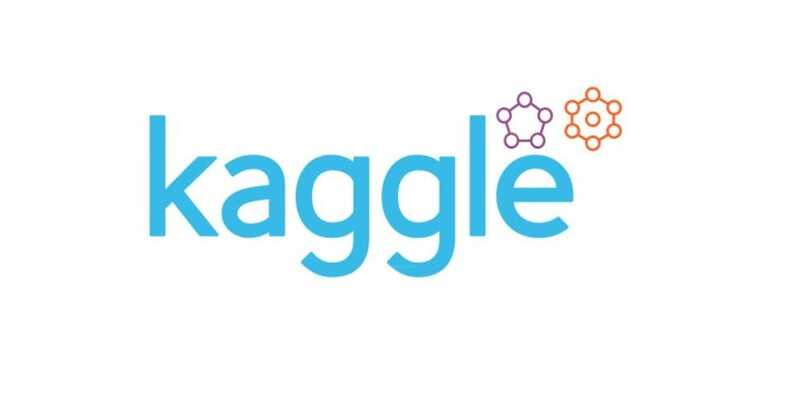
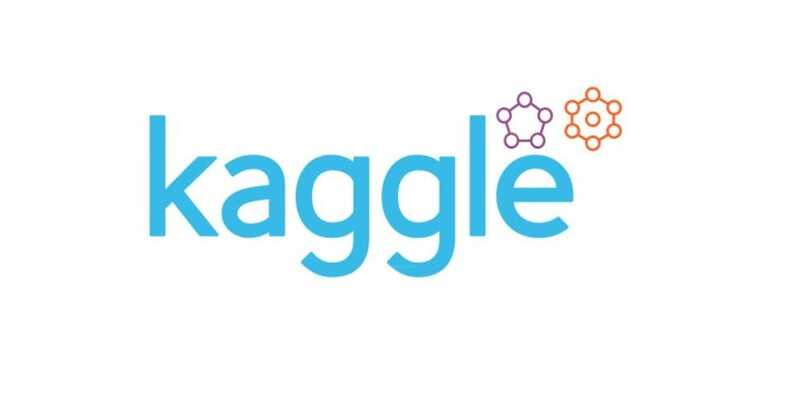
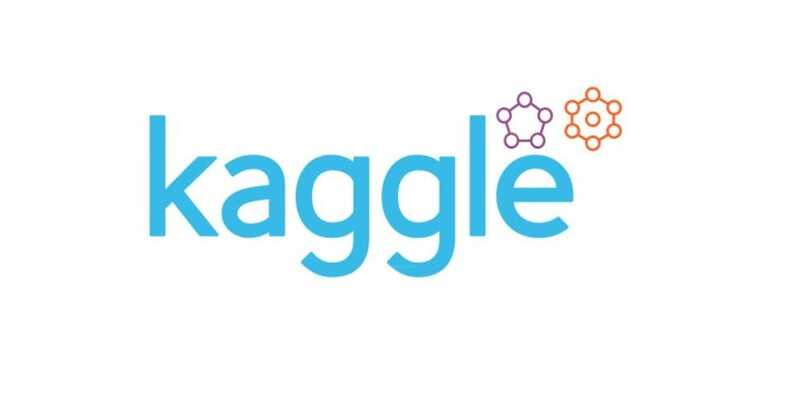
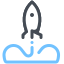

## 1. Libraries Required

****In this section, we import all the necessary Python libraries used throughout the project.****  
**These include libraries for**:
- **Data manipulation**  
- **Visualization** 
- **Machine learning**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## 2. Load Dataset

In [2]:
df_train=pd.read_csv('/kaggle/input/titanic/train.csv')
df_test=pd.read_csv('/kaggle/input/titanic/test.csv')
df_test['Survived']=False
df=pd.concat([df_train,df_test],sort=True)

In [3]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


## 3. Data Exploration & Cleaning

## 3.1 Overview

**Check shape, missing values, data types.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     1309 non-null   int64  
 11  Ticket       1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


## 3.2 Visualization

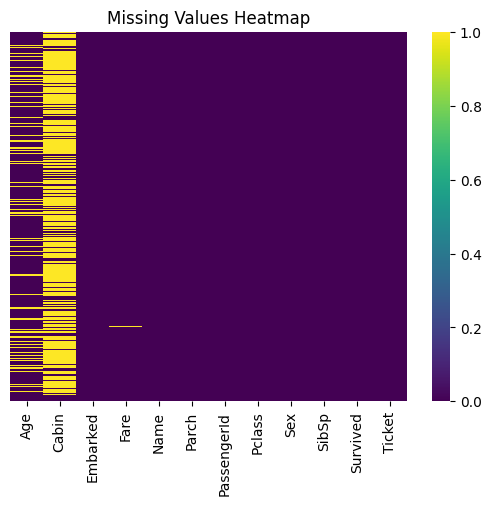

Missing Data Summary:



,Missing_Values,Percentage,Data_Type
Cabin,1014,77.463713,object
Age,263,20.091673,float64
Embarked,2,0.152788,object
Fare,1,0.076394,float64


In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()
missing_data = pd.DataFrame({
    'Missing_Values': df.isnull().sum(),
    'Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
})
missing_data = missing_data[missing_data['Missing_Values'] > 0]

missing_data = missing_data.sort_values(by='Missing_Values', ascending=False)

print("Missing Data Summary:\n")
display(missing_data)

## 3.3 Survival Rate
**Survival Rate of Women**,**Survival Rate of men**

In [6]:
print("Rate of women survived:", df[df['Sex'] == 'female']['Survived'].mean())
print('Rate of man survived', df[df['Sex'] == 'male']['Survived'].mean())

Rate of women survived: 0.5
Rate of man survived 0.12930011862396204


# 3.4 Filling missing values

In [7]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Fare']=df['Fare'].fillna(df['Fare'].mean())

In [8]:
df['Embarked']=df['Embarked'].fillna('S')
df['Sex']=df['Sex'].fillna('unknown')

In [9]:
df.drop(['Cabin'],axis=1,inplace=True)

# 3.5 Encoding 

In [10]:
df['Embarked']=df['Embarked'].map({'C':0,'Q':1,'S':2})

df['Ticket']=df['Ticket'].astype('category').cat.codes
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1,'unknown': -1}).astype('int64')


# 3.6 Remove irrelevant columns

In [11]:
df.drop(['Name'],axis=1,inplace=True)

🔍 Missing Data Summary:



,Missing_Values,Percentage,Data_Type


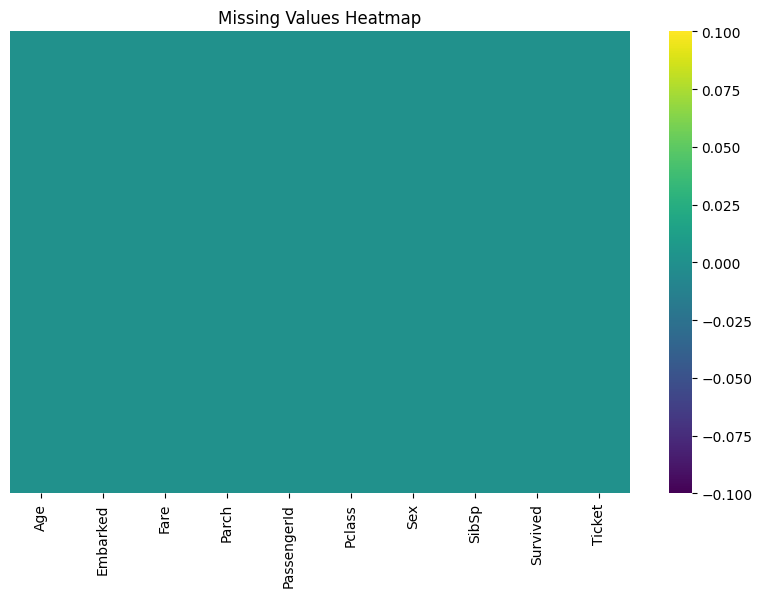

In [12]:
def check_missing(df):
    # Summary table
    missing_data = pd.DataFrame({
        'Missing_Values': df.isnull().sum(),
        'Percentage': (df.isnull().sum() / len(df)) * 100,
        'Data_Type': df.dtypes
    })
    missing_data = missing_data[missing_data['Missing_Values'] > 0]
    missing_data = missing_data.sort_values(by='Missing_Values', ascending=False)
    
    # Print + display
    print("🔍 Missing Data Summary:\n")
    display(missing_data)
    
    # Heatmap
    plt.figure(figsize=(10,6))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title("Missing Values Heatmap")
    plt.show()
check_missing(df)

In [13]:
df_train, df_test = df[:df_train.shape[0]], df[df_train.shape[0]:]
df_test = df_test.drop(columns = 'Survived')
df_train.shape, df_test.shape

((891, 10), (418, 9))

## 4. Model Building
**Libraries Required**

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier


# Split Data

In [15]:
X=df_train.drop(columns='Survived')
y=df_train['Survived']

# Train Model,Evaluate Model

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    verbosity=0   # <-- set to 0 to suppress info/warnings
)
model.fit(X_train, y_train)

# === . Evaluate ===
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# === . Feature Importance ===
importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False).head(10))


Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Sex            0.419649
Pclass         0.163115
SibSp          0.086276
Parch          0.065934
Embarked       0.062248
Age            0.054345
Fare           0.052880
Ticket         0.050891
PassengerId    0.044661
dtype: float32


# Submission File

In [35]:
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': model.predict(df_test[X.columns])  # prediction on test set
})


submission.to_csv('submission.csv', index=False)
print(" Submission file created: submission.csv")

 Submission file created: submission.csv


## 4.1 Model Accuracy_Score
**Predictions on training data**

In [36]:
from sklearn.model_selection import cross_val_score

# === Cross-validation RMSE ===
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')  # regression
rmse_scores = np.sqrt(-scores)
print(f"CV RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")


# For demonstration, using the mean RMSE as "local score"
local_score = rmse_scores.mean()
print(f"Local Score (simulating leaderboard): {local_score:.4f}")


CV RMSE: 0.4413 ± 0.0619
Local Score (simulating leaderboard): 0.4413


In [37]:
acc = accuracy_score(y_test, y_pred)  # note: using X_test & y_test as local validation
print(f"Local Accuracy (simulating Kaggle leaderboard): {acc:.4f}")


Local Accuracy (simulating Kaggle leaderboard): 0.8268
